In [2]:
import pandas as pd
pd.set_option("display.max_colwidth", 200)
import numpy as np
# import re
import spacy

# import gensim
# from gensim import corpora

# libraries for visualization
# import pyLDAvis
# import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_json('data/Automotive_5.json', lines=True)
df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,B00002243X,"[4, 4]",5,I needed a set of jumper cables for my new car and these had good reviews and were at a good price. They have been used a few times already and do what they are supposed to - no complaints there....,"08 17, 2011",A3F73SC1LY51OO,Alan Montgomery,Work Well - Should Have Bought Longer Ones,1313539200
1,B00002243X,"[1, 1]",4,"These long cables work fine for my truck, but the quality seems a little on the shabby side. For the money I was not expecting 200 dollar snap-on jumper cables but these seem more like what you wo...","09 4, 2011",A20S66SKYXULG2,alphonse,Okay long cables,1315094400
2,B00002243X,"[0, 0]",5,"Can't comment much on these since they have not yet been used (I will come back and update my review is I find any issues after first use) ... but they are built solid, nice tough big hard clamps ...","07 25, 2013",A2I8LFSN2IS5EO,Chris,Looks and feels heavy Duty,1374710400
3,B00002243X,"[19, 19]",5,"I absolutley love Amazon!!! For the price of a set of cheap Booster/Jumper Cables in a brick and morter store, you can buy extra long and heavy duty jumpers! First off, don't be the person that ...","12 21, 2010",A3GT2EWQSO45ZG,DeusEx,Excellent choice for Jumper Cables!!!,1292889600
4,B00002243X,"[0, 0]",5,"I purchased the 12' feet long cable set and they arrived in a retail cardboard box with handle, which could be used as a storage and carrying case for these cables, although I will not need to sto...","07 4, 2012",A3ESWJPAVRPWB4,E. Hernandez,"Excellent, High Quality Starter Cables",1341360000


In [4]:
# Data preprocessing
# remove the punctuations, stopwords and normalize the reviews as much as possible.


# function to plot most frequent terms

def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word': list(fdist.keys()), 'count':list(fdist.values())})
    
    # selecting top 20 most frequent words
    d = words_df.nlargest(columns="count", n = terms)
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x="word", y = "count")
    ax.set(ylabel = "Count")
    plt.show()

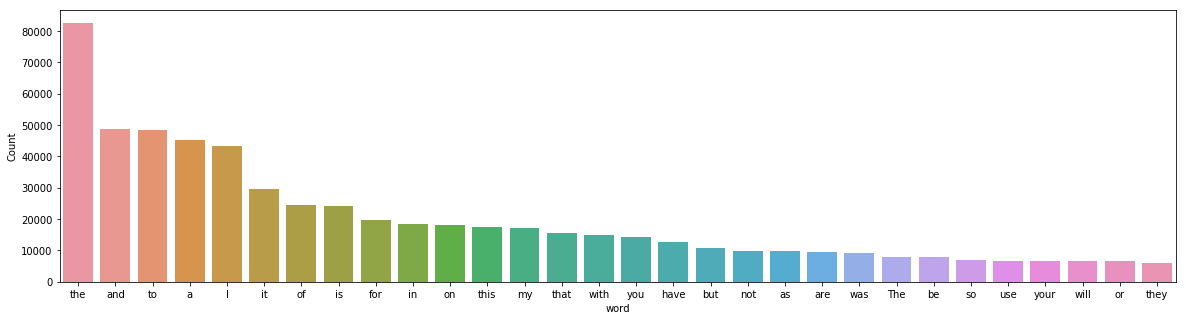

In [5]:
freq_words(df['reviewText'])

In [6]:
# remove unwanted characters, numbers and symbols

df['reviewText'] = df['reviewText'].str.replace("[^a-zA-Z#]", " ")

In [7]:
# remove stopwords and short words (<2 letters)
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

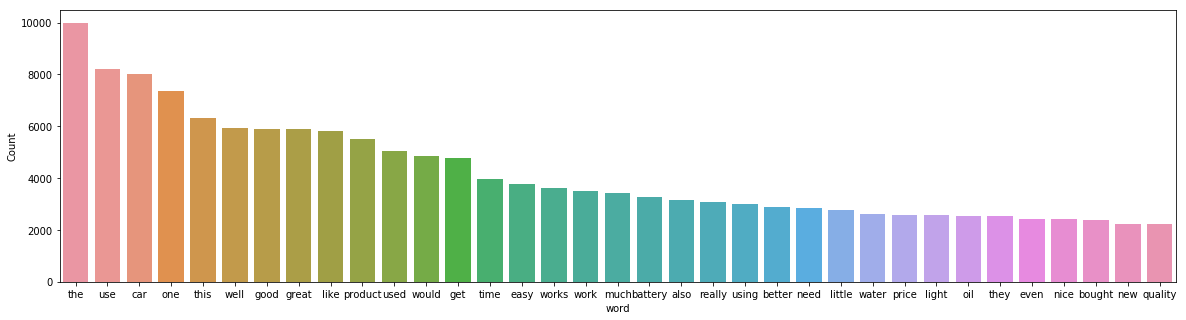

In [8]:
# function to remove stopwords
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

# remove short words(length<3)
df['reviewText'] = df['reviewText'] .apply(lambda x: ' '.join([w for w in x.split() if len (w)>2]))

# remove stopwords from the text
reviews = [remove_stopwords(r.split()) for r in df['reviewText']]

# make entire text lowercase
reviews = [r.lower() for r in reviews]

freq_words(reviews, 35)

In [9]:
nlp = spacy.load('en', disable=['parser', 'ner'])

def lemmatization(texts, tags=['NOUN', 'ADJ']): # filter noun and adjective
    output = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        output.append([token.lemma_ for token in doc if token.pos_ in tags])
    return output

In [10]:
tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())
print(tokenized_reviews[1])

['these', 'long', 'cables', 'work', 'fine', 'truck', 'quality', 'seems', 'little', 'shabby', 'side', 'for', 'money', 'expecting', 'dollar', 'snap', 'jumper', 'cables', 'seem', 'like', 'would', 'see', 'chinese', 'knock', 'shop', 'like', 'harbor', 'freight', 'bucks']


In [11]:
reviews_2 = lemmatization(tokenized_reviews)
print(reviews_2[1]) # print lemmatized review

['long', 'cable', 'fine', 'truck', 'quality', 'little', 'shabby', 'side', 'money', 'dollar', 'jumper', 'cable', 'chinese', 'shop', 'harbor', 'freight', 'buck']


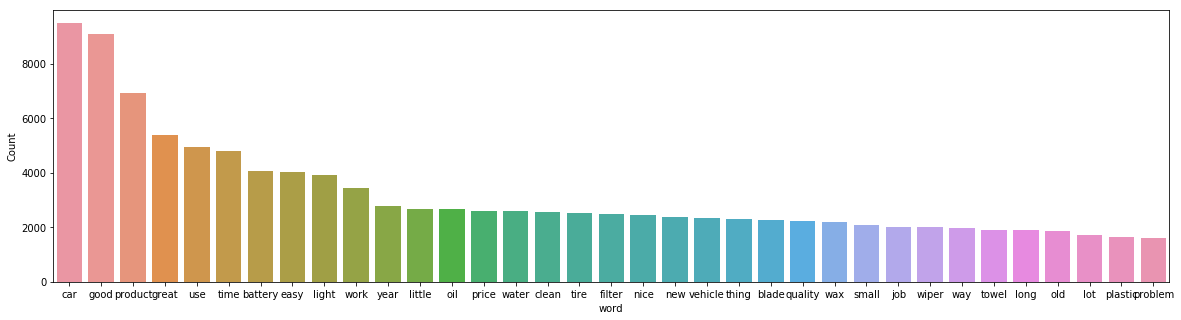

In [12]:
reviews_3 = []
for i in range(len(reviews_2)):
    reviews_3.append(' '.join(reviews_2[i]))
    
df['reviews'] = reviews_3

freq_words(df['reviews'], 35)

In [9]:
from textblob import TextBlob
from textblob.classifiers import NaiveBayesClassifier


with open('data/datatrain.json', 'r') as fp:
    cl = NaiveBayesClassifier(fp, format="json")

In [10]:
blob = TextBlob("works", classifier=cl)
blob.classify()

'pos'

In [11]:
blob.sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [12]:
print(str(blob.sentiment.polarity) + " is polarity value, subjectivity value is " + str(blob.sentiment.subjectivity))

0.0 is polarity value, subjectivity value is 0.0


In [14]:
blob2=TextBlob("great and usefull", classifier=cl)
p = blob.classify()
if blob.sentiment[0] == 0:
    p = "neutral"
print (p)

neutral


In [15]:
p = blob2.classify()
if blob2.sentiment[0] == 0:
    p = "neutral"
print (p)

pos


In [8]:
blob4=TextBlob("ugly and doesn't works. i regret bought it", classifier=cl)
p = blob4.classify()
if blob4.sentiment[0] == 0:
    p = "neutral"
print (p)

pos


In [ ]:
import re, string
# make a string which is punctuation without dot
dot = "."
table = str.maketrans(dot," ")
punctuations = string.punctuation
punctuations = punctuations.translate(table)

table32 = str.maketrans(punctuations,32*" ")
# more dots
consequitivedots = re.compile(r'\.{3,}')

# make a function to remove punctuation and consecutive dots for a string
def RemovePunctuations(slist):
    new_list = []
    for s in slist:
        s = s.replace("'", '')
        s = s.translate(table32)
        s = re.sub(' +', ' ', s)
        s = consequitivedots.sub('.', s)
        new_list.append(s)
    return new_list

# test the function

reviews = RemovePunctuations(reviews)

In [ ]:
###########################################CEK ONE BY ONE##################

In [9]:
# read stopwords, positive, negative, negation wordlist
s_col_names = ['stp']
s_words = pd.read_csv(
    '../data/dictionary/stopwords.csv',
    header=None,
    names=s_col_names,
    low_memory=False)

p_col_names = ['pos']
p_words = pd.read_csv(
    '../data/dictionary/positive_words.csv',
    header=None,
    names=p_col_names,
    low_memory=False)

n_col_names = ['negve']
n_words = pd.read_csv(
    '../data/dictionary/negative_words.csv',
    header=None,
    names=n_col_names,
    low_memory=False)

nt_col_names = ['negtion']
nt_words = pd.read_csv(
    '../data/dictionary/negation_words.csv',
    header=None,
    names=nt_col_names,
    low_memory=False)

# make list from dataframes
stopwords = [str(y) for y in s_words.stp]
positive_words = [str(x) for x in p_words.pos]
negative_words = [str(y) for y in n_words.negve]
negation_words = [str(y) for y in nt_words.negtion]


In [11]:
# replace the apostrophe from the lists
def ReplaceApostrophe(thelist):
    newlist = []
    for word in thelist:
        word = word.replace("'", '')
        newlist.append(word)
    return newlist

stopwords = list(set(ReplaceApostrophe(stopwords)))
negative_words = list(set(ReplaceApostrophe(negative_words)))
negation_words = list(set(ReplaceApostrophe(negation_words)))
positive_words = list(set(ReplaceApostrophe(positive_words)))

In [9]:
from nltk.tokenize import word_tokenize 
# for review in reviews:
# review = "i like it"
# review = "i dont like"
# review = "i dont like it but"
# review = "i dont like it but i love it"
# review = "its no good enough"
# review = "its no good enough."
# review = "its no good enough. wont"
# review = "its no good enough. wont repurchase"

# review = "For those that have Prime this is almost a must have. Keeps all your Amazon stuff in one place."

# review = "not too satisfied with the sound and it loses Bluetooth connection no matter what phone i use either Iphone or Android."

# review = "Really cool device! Instantly noticed the difference in quality when I switched from the regular Fire Stick to the Fire TV with 4k."

# review = "so far so good wife very happy. misses her old one"

# review = "meh. it works. i find it difficult to navigate. i also have an ipad mini. this seems to be less intuitive than the ipad."
review = "This tablet has it all. Amazon offers tons of free apps, hundreds of thousands of free e-books and tons of free games. The tablet is intuitive and intelligent. I seamlessly enjoy streaming my favorite shows and reading articles, books and periodicals. What I love most is that the tablet doesn't place all apps on the device, but uses the users miro SD card instead for up to 200GB of additional storage for a dizzying amount of storage for more games, apps, books and movies that can be downloaded and enjoyed. It also allows the owner to share the device with family members, delegating each member an account personalized and tailored to that individual. There is even an option to create children's accounts--extra bonus. I am able to mirror the content from the tablet onto my Samsung Smart television. I will definitely consider Amazon first and foremost when making any future tablet purchases. It maintains a charge for a good deal of time, alleviating the need to be near an outlet to enjoy using it. I can charge it in the evening and use it for several hours the next day, sometimes two days. No one will ever create a tablet that is more considerate of the owner/end-user."
# "it loses Bluetooth connection no matter what phone I use (either Iphone or Android)."


word_tokens = word_tokenize(review)
dot = "."
count_pos = count_neg = count_nt = sentence_pos = sentence_neg =0
count_cw = 0
order = 0
filtered_sentence = [w for w in word_tokens if not w in stopwords]
print(filtered_sentence)
len_filtered = len(filtered_sentence)
print(len_filtered)
for word in filtered_sentence:
    order += 1
    if count_cw == 0 or order == len_filtered or word is dot:
        if word in positive_words:
            if count_nt == 0:
                if order == len_filtered:
                    sentence_pos += 1
                    count_pos = count_neg = count_nt = 0
                else:
                    count_pos += 1
#                     print(word)
            elif count_nt > 0:
                if order == len_filtered:
                    sentence_neg += 1
                    count_pos = count_neg = count_nt = 0
                else:
                    count_neg += 1
                    count_nt = 0
#                     print(word)

        elif word in negative_words:
            if count_nt == 0:
                if order == len_filtered:
                    sentence_neg += 1
                    count_pos = count_neg = count_nt = 0
                else:
                    count_neg += 1
#                 print(word)            
            elif count_nt > 0:
                if order == len_filtered:
                    sentence_pos += 1
                    count_pos = count_neg = count_nt = 0
                else:
                    count_pos += 1
                    count_nt = 0
        elif word in connect_words:
            count_cw += 1


        elif word in negation_words:
            if count_neg ==0 & count_pos == 0:
#               negation is front of sentence (before positive or negative word)
                if order == len_filtered:
#                     sentence_neg += 1
                    count_pos = count_neg = count_nt = 0
                else:
                    count_nt += 1
            elif count_neg > 0:
#               negation reverse the negative word to positive word
#                 count_pos += 1
#     how if: "i dont like it but i love it. well its not very good?" ngaco pisan
                count_neg = count_nt = count_pos =0
                sentence_pos += 1
                break
            elif count_pos > 0:
#               negation reverse the positive word to negative word
#                 count_neg += 1
                count_pos = count_nt = count_neg = 0
                sentence_neg += 1
                break
        elif word is dot or order == len_filtered :
#             or word in adverb_words:
            if count_pos > 0:
                sentence_pos += 1
            elif count_neg > 0:
                sentence_neg += 1
    #         elif count_nt > 0:
    #             sentence_neg += 1
            count_pos = count_neg = count_nt = count_cw = 0

# check which has value
# sentence_pos = count_pos
# sentence_neg = count_neg
print('count_pos = ' + str(count_pos))
print("count_neg = " + str(count_neg))
print("count_nt = " + str(count_nt))
print("count_cw = " + str(count_cw))
print("sentence_pos = " + str(sentence_pos))
print("sentence_neg = " + str(sentence_neg))
label_sent = 0
sum_sentence = sentence_neg + sentence_pos
if sum_sentence ==0 :
    label_sent = float(0)
else:    
    per_pos = sentence_pos/sum_sentence
    per_neg = sentence_neg/sum_sentence
    if  per_pos > 0.6:
        label_sent = float(3)
    elif per_neg > 0.6:
        label_sent = float(1)
    else:
        label_sent = float(2)
print(label_sent)

['This', 'tablet', '.', 'Amazon', 'offers', 'tons', 'free', 'apps', ',', 'hundreds', 'thousands', 'free', 'e-books', 'tons', 'free', 'games', '.', 'The', 'tablet', 'intuitive', 'intelligent', '.', 'I', 'seamlessly', 'enjoy', 'streaming', 'favorite', 'shows', 'reading', 'articles', ',', 'books', 'periodicals', '.', 'What', 'I', 'love', 'tablet', "n't", 'place', 'apps', 'device', ',', 'uses', 'users', 'miro', 'SD', 'card', 'instead', '200GB', 'additional', 'storage', 'dizzying', 'amount', 'storage', 'games', ',', 'apps', ',', 'books', 'movies', 'downloaded', 'enjoyed', '.', 'It', 'also', 'allows', 'owner', 'share', 'device', 'family', 'members', ',', 'delegating', 'member', 'account', 'personalized', 'tailored', 'individual', '.', 'There', 'even', 'option', 'create', 'children', "'s", 'accounts', '--', 'extra', 'bonus', '.', 'I', 'able', 'mirror', 'content', 'tablet', 'onto', 'Samsung', 'Smart', 'television', '.', 'I', 'definitely', 'consider', 'Amazon', 'first', 'foremost', 'making', 'f

NameError: name 'connect_words' is not defined

['tablet', '.', 'amazon', 'offers', 'tons', 'free', 'apps', ',', 'hundreds', 'thousands', 'free', 'e-books', 'tons', 'free', 'games', '.', 'tablet', 'intuitive', 'intelligent', '.', 'seamlessly', 'enjoy', 'streaming', 'favorite', 'shows', 'reading', 'articles', ',', 'books', 'periodicals', '.', 'love', 'tablet', "n't", 'place', 'apps', 'device', ',', 'uses', 'users', 'miro', 'sd', 'card', 'instead', '200gb', 'additional', 'storage', 'dizzying', 'amount', 'storage', 'games', ',', 'apps', ',', 'books', 'movies', 'downloaded', 'enjoyed', '.', 'also', 'allows', 'owner', 'share', 'device', 'family', 'members', ',', 'delegating', 'member', 'account', 'personalized', 'tailored', 'individual', '.', 'even', 'option', 'create', 'children', "'s", 'accounts', '--', 'extra', 'bonus', '.', 'able', 'mirror', 'content', 'tablet', 'onto', 'samsung', 'smart', 'television', '.', 'definitely', 'consider', 'amazon', 'first', 'foremost', 'making', 'future', 'tablet', 'purchases', '.', 'maintains', 'charge',

In [ ]:
# from textblob import TextBlob
# from textblob.classifiers import NaiveBayesClassifier


# with open('data/datatrain.json', 'r') as fp:
#     cl = NaiveBayesClassifier(fp, format="json")
# sentiment = []
# for x in reviews:
#     blob = TextBlob(x, classifier=cl)
#     r = blob.classify()
#     if blob.sentiment[0] == 0:
#         r = 'neutral'
#     sentiment.append(r)
# sentiment_label = []


# for x in sentiment:
#     if x == 'pos':
#         v = 3
#     elif x == 'neg':
#         v = 1
#     else:
#         v = 2
#     sentiment_label.append(v)
# data_test_filter['label']=sentiment_label
# data_test_filter['label']=data_test_filter[
#     'label'].astype('float64')  


# data_test_filter.to_csv("data/data_test_filter.csv")

In [ ]:
import string
string.punctuation

In [12]:
# The Sentiment Analysis Class
import re
# import enchant
# weng = enchant.Dict("en_US")

def reduce_lengthening(text):
    pattern = re.compile(r"(.)\1{2,}")
    return pattern.sub(r"\1\1", text)

from nltk.tokenize import word_tokenize 
def SentimentAnalysis(testimony):
    testimony_value = []
    for review in testimony:    
        # tokenize the review
        word_tokens = word_tokenize(review)

        # remove stopwords
        filtered_sentence = [w for w in word_tokens if not w in stopwords]

        # value gived by words type
        score_pos = 1
        score_neg = -1

        negation  = neg = passing = False
        sum_score = 0

        for word in filtered_sentence:
            
            word = reduce_lengthening(word)
            if word in positive_words:
                if negation is True:
                    sum_score += score_neg
                    negation = False
#                 elif pos is True:
#                     pos = False 
                else:
                    sum_score += score_pos
#                 pos = True

            elif word in negative_words:
                if neg is True:
                    sum_score += score_pos
                elif negation is True:
                    sum_score += score_pos
                    negation = False
#                 elif pos is True:
#                     pos = False
                else:
                    sum_score += score_neg
                neg = True

            elif word in negation_words:
                negation = True

            elif negation is True:
                if passing is False:
                    passing = True
                else:
                    negation = passing = False
            else:
                neg = False

        testimony_value.append(float(sum_score))       
    return testimony_value